In [2]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(patchwork)
library(cowplot)
library(ggbreak)
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 alread

# Step 1. Load data

In [3]:
df <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/simulation/obj2/simulation.varying-S-distribution.tsv",
    sep = "\t"
)

head(df)

A_true,X_true,distribution,X,lower_X,upper_X
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0.4,0.02,uniform,0.03031464,0.008999884,0.04194934
0.4,0.02,normal,0.03086290,0.020113236,0.04825554
0.4,0.02,left_skewed,0.03097752,0.014033147,0.04599188
0.4,0.02,right_skewed,0.02497139,0.011548845,0.04863575
0.4,0.02,uniform,0.03043065,0.015486524,0.04843237
0.4,0.02,normal,0.02849621,0.018242880,0.04641369


# plot theme

In [4]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),  
            
            # 축 설정
            axis.line.x.top = element_blank(),
            axis.line.y.right = element_blank(),
            axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(0, 0, 0, 0)
        )
}

# Tested distribution

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


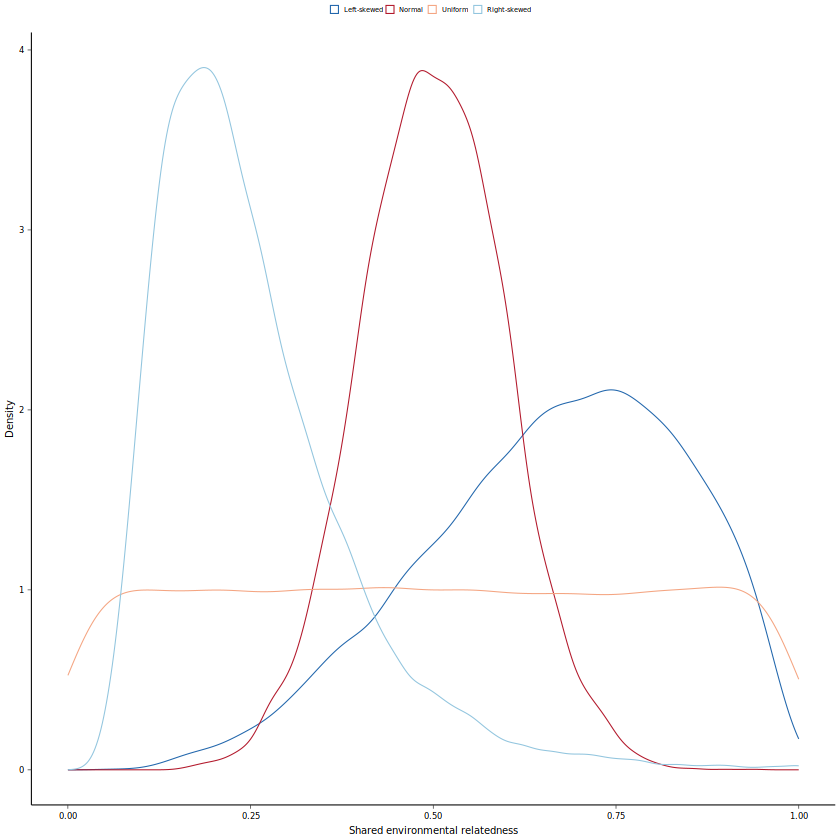

In [5]:
# 데이터 생성
n_sample <- 10000
left_skewed <- pmin(pmax(rbeta(n_sample, 4, 2), 0), 1)
normal <- rnorm(n_sample, mean = 0.5, sd = 0.1)
uniform <- runif(n_sample, min = 0, max = 1)
right_skewed <- pmin(pmax(rlnorm(n_sample, meanlog = -1.5, sdlog = 0.5), 0), 1)

# 데이터프레임 생성 시 distribution을 factor로 변환하고 레벨 지정
df_dist <- data.frame(
  value = c(left_skewed, normal, uniform, right_skewed),
  distribution = factor(
    c(rep("left_skewed", n_sample), rep("normal", n_sample), 
      rep("uniform", n_sample), rep("right_skewed", n_sample)),
    levels = c("left_skewed", "normal", "uniform", "right_skewed")  # 순서 지정
  )
)

p <- ggplot(df_dist, aes(x = value, color = distribution)) +
  geom_density(size = 0.3) +
  scale_color_manual(
    values = c("#2166AC", "#B2182B", "#F4A582", "#92C5DE"),
    labels = c("Left-skewed", "Normal", "Uniform", "Right-skewed"),
    breaks = c("left_skewed", "normal", "uniform", "right_skewed")  # 순서 명시
  ) +
  labs(x = "Shared environmental relatedness",
       y = "Density",
       color = "") +
  get_nature_theme() +
  theme(
    text = element_text(size = 6),
    axis.text = element_text(size = 5),
    axis.title = element_text(size = 6),
    legend.position = "top",
    legend.text = element_text(size = 4),
    legend.key.size = unit(0.2, "cm"),
    legend.spacing.x = unit(0.1, "cm"),
    legend.margin = margin(0, 2, 0, 0, unit = "mm"),
    plot.margin = margin(1, 1, 1, 1, "mm"),
    axis.line = element_line(size = 0.2),
    axis.ticks = element_line(size = 0.2)
  )

p

In [6]:

output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/simulation.tested-S-distribution.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 55,
    height = 46,
    units = "mm",
    dpi = 300,
    device = cairo_pdf
)


# Step 2. Plot

In [7]:
df %>%
    group_by(distribution) %>%
    summarise(
        mean_X = median(X),
        mean_lower = median(lower_X),
        mean_upper = median(upper_X),
        .groups = 'drop'
    )

distribution,mean_X,mean_lower,mean_upper
<chr>,<dbl>,<dbl>,<dbl>
left_skewed,0.02179820,0.002672665,0.03754117
normal,0.01949944,0.005645536,0.03565978
right_skewed,0.01559402,0.001066415,0.03432337
uniform,0.01965575,0.001524779,0.03658455


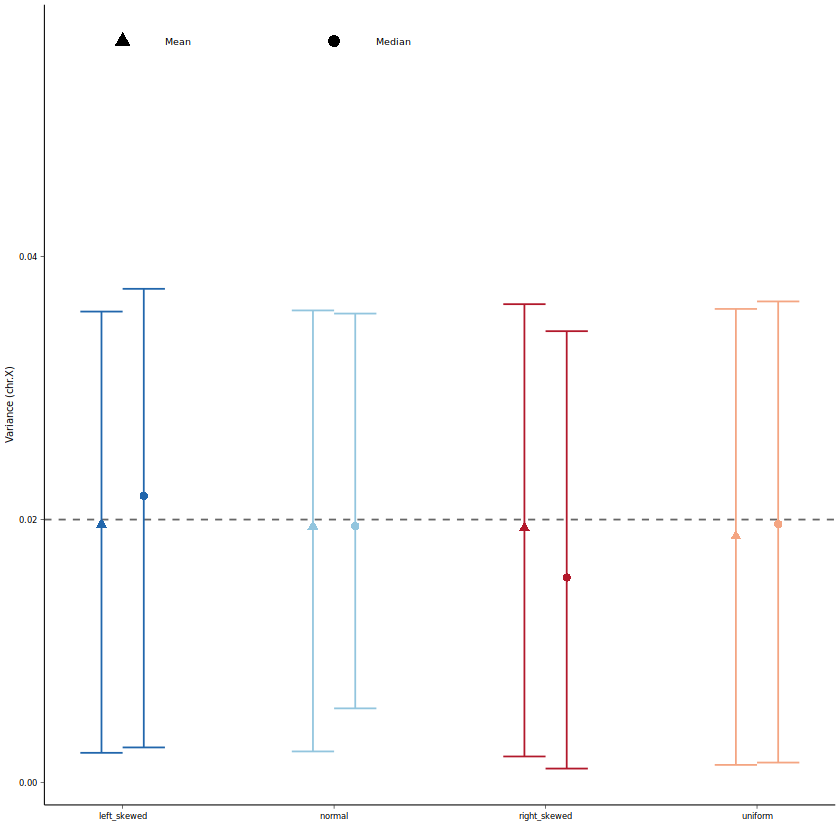

In [21]:
plot_dist_means <- function(data) {
    # 시나리오별 평균값과 중앙값 계산
    dist_stats <- data %>%
        group_by(distribution) %>%
        summarise(
            median_X = median(X),
            median_lower_X = median(lower_X),
            median_upper_X = median(upper_X),
            mean_X = mean(X),
            mean_lower_X = mean(lower_X),
            mean_upper_X = mean(upper_X),
            .groups = 'drop'
        )

    # 색상 정의
    base_colors <- c(
        "left_skewed" = "#2166AC",
        "normal" = "#92C5DE",
        "uniform" = "#F4A582",
        "right_skewed" = "#B2182B"
    )
    
    # jitter를 위한 위치 조정
    jitter_width <- 0.1
    
    ggplot() +
        # 실제 X_true 값을 수평선으로 표시
        geom_hline(
            yintercept = unique(data$X_true),
            linetype = "dashed",
            color = "gray40"
        ) +
        # mean 값을 삼각형으로 표시
        geom_point(
            data = dist_stats,
            aes(x = as.numeric(factor(distribution)) - jitter_width, y = mean_X, color = distribution),
            size = 2,
            shape = 17  # 삼각형
        ) +
        # mean의 CI를 에러바로 표시
        geom_errorbar(
            data = dist_stats,
            aes(x = as.numeric(factor(distribution)) - jitter_width, 
                ymin = mean_lower_X, 
                ymax = mean_upper_X, 
                color = distribution),
            width = 0.2
        ) +
        # median 값을 원으로 표시
        geom_point(
            data = dist_stats,
            aes(x = as.numeric(factor(distribution)) + jitter_width, y = median_X, color = distribution),
            size = 2,
            shape = 16  # 원
        ) +
        # median의 CI를 에러바로 표시
        geom_errorbar(
            data = dist_stats,
            aes(x = as.numeric(factor(distribution)) + jitter_width, 
                ymin = median_lower_X, 
                ymax = median_upper_X, 
                color = distribution),
            width = 0.2
        ) +
        # 색상 설정
        scale_color_manual(values = base_colors) +
        scale_x_continuous(
            breaks = 1:4,
            labels = levels(factor(dist_stats$distribution))
        ) +
        # 마커 종류에 대한 범례 추가
        annotate("point", x = 1, y = max(dist_stats$mean_upper_X) + 0.02, shape = 17, size = 3, color = "black") +
        annotate("text", x = 1.2, y = max(dist_stats$mean_upper_X) + 0.02, label = "Mean", hjust = 0, size = 2) +
        annotate("point", x = 2, y = max(dist_stats$mean_upper_X) + 0.02, shape = 16, size = 3, color = "black") +
        annotate("text", x = 2.2, y = max(dist_stats$mean_upper_X) + 0.02, label = "Median", hjust = 0, size = 2) +
        labs(
            x = "",
            y = "Variance (chr.X)"
        ) +
        get_nature_theme() +
        theme(
            legend.position = "none",
            text = element_text(size = 6),
            axis.text = element_text(size = 5),
            axis.title = element_text(size = 6),
            legend.text = element_text(size = 5),
            legend.key.size = unit(0.2, "cm"),
            legend.spacing.x = unit(0.1, "cm"),
            legend.margin = margin(0, 0, 0, 0),
            plot.margin = margin(t = 1, r = 1, b = 1, l = 1, "mm"),  # 상단 여백 증가
            axis.line = element_line(size = 0.2),
            axis.ticks = element_line(size = 0.2)
        )
}

p <- plot_dist_means(df)
p


In [22]:

output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/simulation.X-varying-S-distribution.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 55,
    height = 46,
    units = "mm",
    dpi = 300,
    device = cairo_pdf
)
